In [1]:
#in case you don't have seaborn locally installed
%pip install seaborn

In [109]:
#importing dependencies
import random
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats
from collections import Counter
import itertools
import statistics
from scipy.stats import kstest, uniform

## This section defines functions used in each of the bots.
##### The first, new_game() initializes an empty score sheet for a game of Yahtzee.
##### Yahtzee() rolls six dice and initializes a roll count to prevent rerolls from happening more than twice.
##### calculate_score() takes a current die roll and active score sheet and checks for available categories to score. If a category has already been scored, this function will correctly deduce the total amount of points for selecting a category including any relevant bonuses achieved. 
##### select_category() populates the active score sheet with a selected category, allowing the bots to select whichever category they desire. 

In [100]:
#Initializes a new game
def new_game():
    score_sheet = {'Sixes': 'Not Scored', 'Fives': 'Not Scored', 'Fours': 'Not Scored', 'Threes': 'Not Scored',
                   'Twos': 'Not Scored', 'Ones': 'Not Scored', 'Three of a Kind': 'Not Scored',
                   'Four of a Kind': 'Not Scored', 'Yahtzee': 'Not Scored', 'Full House': 'Not Scored',
                   'Small Straight': 'Not Scored', 'Large Straight': 'Not Scored', 'Chance': 'Not Scored',
                   'Upper Bonus': 0, 'Yahtzee Bonus': 0}
    return score_sheet

#Rolls 6 dice for the initial dice roll of a round.
def yahtzee():
    dice = [random.randrange(1, 7) for _ in range(5)]
    roll_count = 1
    return dice, roll_count

#takes an input of to_reroll to decide which dice to reroll
def reroll(to_reroll, dice):
    for index, reroll_flag in enumerate(to_reroll):
        if reroll_flag == 1:  # Check if the die needs to be rerolled
            dice[index] = random.randrange(1, 7)
    return dice
    
#Populates a list of possible scores for the present dice value.
def calculate_score(dice, score_sheet):
    # Upper Section
    Sixes = 6 * dice.count(6)
    Fives = 5 * dice.count(5)
    Fours = 4 * dice.count(4)
    Threes = 3 * dice.count(3)
    Twos = 2 * dice.count(2)
    Ones = 1 * dice.count(1)
    Upper = [Sixes, Fives, Fours, Threes, Twos, Ones]

    #Adding current scores to check if upper bonus is applied this turn
    Upper_total = int(
        (score_sheet.get('Ones', 0) if score_sheet.get('Ones') != "Not Scored" else 0) +
        (score_sheet.get('Twos', 0) if score_sheet.get('Twos') != "Not Scored" else 0) +
        (score_sheet.get('Threes', 0) if score_sheet.get('Threes') != "Not Scored" else 0) +
        (score_sheet.get('Fours', 0) if score_sheet.get('Fours') != "Not Scored" else 0) +
        (score_sheet.get('Fives', 0) if score_sheet.get('Fives') != "Not Scored" else 0) +
        (score_sheet.get('Sixes', 0) if score_sheet.get('Sixes') != "Not Scored" else 0))

    #Function adds bonus points to the present dice roll if it would satisfy it
    for i in range(len(Upper)):
        if Upper[i] + Upper_total > 63 and score_sheet['Upper Bonus'] == 0:
            Upper[i] += 35
            score_sheet['Upper Bonus'] = 1

    # Lower Section

    #Getting a max dice count for Yahtzees
    counter = Counter(dice).most_common(2)
    max_count = counter[0][1]

    counts = [dice.count(i) for i in range(1, 7)]
    

    full_house = 25 if 2 in counts and 3 in counts else 0

    three_of_a_kind = sum(dice) if max_count >= 3 else 0
    four_of_a_kind = sum(dice) if max_count >= 4 else 0

    small_straight = 30 if [1, 2, 3, 4] in [dice[i:i + 4] for i in range(len(dice) - 3)] or \
                           [2, 3, 4, 5] in [dice[i:i + 4] for i in range(len(dice) - 3)] or \
                           [3, 4, 5, 6] in [dice[i:i + 4] for i in range(len(dice) - 3)] else 0

    large_straight = 40 if sorted(dice) == [1, 2, 3, 4, 5] or sorted(dice) == [2, 3, 4, 5, 6] else 0

    chance = sum(dice)

    
    lower_cats = ['Full House', 'Chance', 'Three of a Kind', 'Four of a Kind', 'Small Straight', 'Large Straight']
    for category in lower_cats:
        if score_sheet[category] != 'Not Scored':
            category = 0

    #prioritizes four of a kind over three of a kind
    if max_count == 4:
        if score_sheet['Four of a Kind'] == 'Not Scored':
            three_of_a_kind = 0
            
    #Handles Yahtzees and bonus yahtzee logic
    if max_count == 5:
        if score_sheet['Yahtzee Bonus'] == 0:
            Yahtzee = 50

        elif score_sheet['Yahtzee Bonus'] > 0:
            Yahtzee = -1
            if dice[0] == 1 and score_sheet['Ones'] == 'Not Scored':
                Upper[5] += 100
            elif dice[0] == 2 and score_sheet['Twos'] == 'Not Scored':
                Upper[4] += 100
            elif dice[0] == 3 and score_sheet['Threes'] == 'Not Scored':
                Upper[3] += 100
            elif dice[0] == 4 and score_sheet['Fours'] == 'Not Scored':
                Upper[2] += 100
            elif dice[0] == 5 and score_sheet['Fives'] == 'Not Scored':
                Upper[1] += 100
            elif dice[0] == 6 and score_sheet['Sixes'] == 'Not Scored':
                Upper[0] += 100
            

            elif score_sheet['Large Straight'] == 'Not Scored':
                large_straight = 100 + 40
            
            elif score_sheet['Full House'] == 'Not Scored':
                full_house = 100 + 25
       
            elif score_sheet['Three of a Kind'] == 'Not Scored':
                three_of_a_kind = 100 + sum(dice)
      
            elif score_sheet['Four of a Kind'] == 'Not Scored':
                four_of_a_kind = 100 + sum(dice)
     
            elif score_sheet['Small Straight'] == 'Not Scored':
                small_straight = 100 + 30
             
            
        
            elif score_sheet['Chance'] == 'Not Scored':
                chance = 100 + sum(dice)
 
    
    if max_count != 5:
        Yahtzee = 0

    # Sheet of scores with category names
    scores = [
        ("Sixes", Upper[0]),
        ("Fives", Upper[1]),
        ("Fours", Upper[2]),
        ("Threes", Upper[3]),
        ("Twos", Upper[4]),
        ("Ones", Upper[5]),
        ("Three of a Kind", three_of_a_kind),
        ("Four of a Kind", four_of_a_kind),
        ("Yahtzee", Yahtzee),
        ("Full House", full_house),
        ("Small Straight", small_straight),
        ("Large Straight", large_straight),
        ("Chance", sum(dice))
    ]
    # Sorting scores in descending order
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

    return sorted_scores, max_count

#Function to use to select a category for scoring. Not used outside of sample usage
def select_category(category, score_sheet, sorted_scores, value):
    if score_sheet[category] == 'Not Scored':
        score_sheet[category] = value
        if category == 'Yahtzee':
            score_sheet['Yahtzee Bonus'] = 1
        return score_sheet
    else:
        raise ValueError("Category already scored")

### Sample usage to simply play Yahtzee


In [90]:
#initialize a game
score_sheet = new_game()

In [91]:
#Roll some dice
dice, roll_count = yahtzee()
dice

[2, 2, 2, 4, 2]

In [92]:
#Populate a sheet of dice to reroll. Use 1 for reroll, 0 for keep.
to_reroll = [1,1,0,0,0]
dice = reroll(to_reroll, dice)
dice

[4, 4, 2, 4, 2]

In [95]:
#Reroll once more if desired
to_reroll = [0,0,0,0,0]
dice = reroll(to_reroll, dice)
#Display scoreable categories
scores, count = calculate_score(dice, score_sheet)
calculate_score(dice, score_sheet)

([('Full House', 25),
  ('Three of a Kind', 16),
  ('Chance', 16),
  ('Fours', 12),
  ('Twos', 4),
  ('Sixes', 0),
  ('Fives', 0),
  ('Threes', 0),
  ('Ones', 0),
  ('Four of a Kind', 0),
  ('Yahtzee', 0),
  ('Small Straight', 0),
  ('Large Straight', 0)],
 3)

In [101]:
#Select a scoring category
selected_cat = 'Yahtzee'
value = 0
select_category(selected_cat, score_sheet, scores, value)

#Repeat until full score sheet!

{'Sixes': 'Not Scored',
 'Fives': 'Not Scored',
 'Fours': 'Not Scored',
 'Threes': 'Not Scored',
 'Twos': 'Not Scored',
 'Ones': 'Not Scored',
 'Three of a Kind': 'Not Scored',
 'Four of a Kind': 'Not Scored',
 'Yahtzee': 0,
 'Full House': 'Not Scored',
 'Small Straight': 'Not Scored',
 'Large Straight': 'Not Scored',
 'Chance': 'Not Scored',
 'Upper Bonus': 0,
 'Yahtzee Bonus': 1}

### Greedy Bot

##### Greedy, or simple yahtzee simulator. The internal logic is strictly to grab the highest possible scoring category every roll without any considerations of rerolls. Iterations determines the number of times the simulation runs.
##### Score sheets and total score for each game are output.

In [4]:
def Greedy(iterations):
    game_count = 0
    score_sheet = new_game()
    games_results = []
    score_sheets = []
    for _ in range(iterations):
        score_sheet = new_game()

        #Plays 13 rounds
        for _ in range(13):
            dice, roll_count = yahtzee()
            sorted_scores, max_count = calculate_score(dice, score_sheet)
            if max_count == 5:
                if dice[0] == 1:
                    upper_cat = 'Ones'
                elif dice[0] == 2:
                    upper_cat = 'Twos'
                elif dice[0] == 3:
                    upper_cat = 'Threes'
                elif dice[0] == 4:
                    upper_cat = 'Fours'
                elif dice[0] == 5:
                    upper_cat = 'Fives'
                elif dice[0] == 6:
                    upper_cat = 'Sixes'
                if score_sheet['Yahtzee'] == 'Not Scored':
                    score_sheet['Yahtzee'] = 50
                    score_sheet['Yahtzee Bonus'] += 1
                elif score_sheet[upper_cat] == 'Not Scored':
                    score_sheet[upper_cat] = 5 * dice[0]
                    score_sheet['Yahtzee Bonus'] += 1
                elif score_sheet[upper_cat] != 'Not Scored':
                    for category, score in sorted_scores:
                        if score_sheet[category] == 'Not Scored':
                            score_sheet[category] = score
                            break
            for category, score in sorted_scores:
                if score_sheet[category] == 'Not Scored':
                    score_sheet[category] = score
                    break
                    
        game_count += 1
        keys_to_include = ['Ones', 'Twos', 'Threes', 'Fours', 'Fives', 'Sixes', 'Three of a Kind', 'Four of a Kind', 'Yahtzee', 'Full House', 'Large Straight', 'Small Straight', 'Chance']
        total_score = 0

        #Calculating total score
        for key in keys_to_include:
            value = score_sheet.get(key, 0)
            if isinstance(value, int):
                total_score += value
            else:
                return score_sheet, dice
        games_results.append(total_score)
        score_sheets.append(score_sheet)
        if game_count == iterations:
            break
    return games_results, score_sheets
                

### Basic
##### Basic is a bot that has a bit of internalized logic considered to be basic strategies. It prioritizes searching to complete a straight if the straight is closer than a yahtzee. It also tries to maximize a full house such that the three of a kind is a 5 or 6. 

In [5]:
def Basic(iterations):
    game_count = 0
    score_sheet = new_game()
    games_results = []
    score_sheets = []
    for _ in range(iterations):
        score_sheet = new_game()
        round_count = 0
        while round_count < 13:
            dice, roll_count = yahtzee()
            sorted_scores, max_count = calculate_score(dice, score_sheet)
            reroll_count = 0
            while reroll_count < 2:

                sorted_scores, max_count = calculate_score(dice, score_sheet)
                top_cat = sorted_scores[0][0]
                #First if we ever have a Yahtzee or Large Straight we should just immediately score it
                if top_cat == 'Yahtzee':
                    break
                elif top_cat == 'Large Straight' and score_sheet['Large Straight'] != 'Not Scored':
                    break   
                elif top_cat == 'Full House' and reroll_count == 1 and round_count > 10:

                    break
                elif top_cat == 'Small Straight':
                    if score_sheet[top_cat] == 'Not Scored':
                        if score_sheet['Large Straight'] == 'Not Scored':
                                if (1 in dice and 2 in dice and 3 in dice and 4 in dice) or (2 in dice and 3 in dice and 4 in dice and 5 in dice) or (3 in dice and 4 in dice and 5 in dice and 6 in dice):
                                    for value in dice:
                                        if value not in [1, 2, 3, 4] and value not in [2, 3, 4, 5] and value not in [3, 4, 5, 6]:
                                            # Mark this dice for rerolling
                                            to_reroll = [1 if die == value else 0 for die in dice]
                                            dice = reroll(to_reroll, dice)
                        if score_sheet['Large Straight'] != 'Not Scored':
                            break

                #Try and get more of the same number if possible
                elif max_count >= 3:
                    die_count = Counter(dice).most_common(1)
                    val = die_count[0][0]
                    # Mark the dice corresponding to other numbers for rerolling
                    for die in dice:
                        to_reroll = [1 if die != val else 0 for die in dice]
                        dice = reroll(to_reroll, dice)

                #Reroll all other dice if the most common value is 5 or 6
                elif max_count == 2:
                    die_count = Counter(dice).most_common(2)
                    val = die_count[1][0]
                    secondary = die_count[0][0]
                    if val == 5 or val == 6:
                        if secondary == 5 and score_sheet['Full House'] == 'Not Scored':
                            to_reroll = [1 if die != val or die != secondary else 0 for die in dice]
                        else:
                            to_reroll = [1 if die != val else 0 for die in dice]
                            dice = reroll(to_reroll, dice)
                    
                reroll_count += 1
            sorted_scores, max_count = calculate_score(dice, score_sheet)
            for category, score in sorted_scores:
                if score_sheet[category] == 'Not Scored':
                    score_sheet[category] = score
                    break
            round_count += 1 
        keys_to_include = ['Ones', 'Twos', 'Threes', 'Fours', 'Fives', 'Sixes', 'Three of a Kind', 'Four of a Kind', 'Yahtzee', 'Full House', 'Large Straight', 'Small Straight', 'Chance']
        total_score = 0
        for key in keys_to_include:
            value = score_sheet.get(key, 0)
            if isinstance(value, int):
                total_score += value
            else:
                return score_sheet, dice
        games_results.append(total_score)
        score_sheets.append(score_sheet)
        if game_count == iterations:
            break
    return games_results, score_sheets


### Yahtz
##### Yahtz will always attempt to score a yahtzee unless it happens to already have a straight. It prioritizes higher numbers in the event of two different two die faces.

In [6]:
def Yahtz(iterations):
    game_count = 0
    score_sheet = new_game()
    games_results = []
    score_sheets = []
    for _ in range(iterations):
        score_sheet = new_game()
        round_count = 0
        while round_count < 13:
            dice, roll_count = yahtzee()
            sorted_scores, max_count = calculate_score(dice, score_sheet)
            reroll_count = 0
            while reroll_count < 2:

                sorted_scores, max_count = calculate_score(dice, score_sheet)
                top_cat = sorted_scores[0][0]
                #First if we ever have a Yahtzee or Large Straight we should just immediately score it
                if top_cat == 'Yahtzee':
                    break
                elif top_cat == 'Large Straight' and score_sheet['Large Straight'] != 'Not Scored':
                    break   
                elif top_cat == 'Small Straight':
                    if score_sheet[top_cat] == 'Not Scored':
                        if score_sheet['Large Straight'] == 'Not Scored':
                                if (1 in dice and 2 in dice and 3 in dice and 4 in dice) or (2 in dice and 3 in dice and 4 in dice and 5 in dice) or (3 in dice and 4 in dice and 5 in dice and 6 in dice):
                                    for value in dice:
                                        if value not in [1, 2, 3, 4] and value not in [2, 3, 4, 5] and value not in [3, 4, 5, 6]:
                                            # Mark this dice for rerolling
                                            to_reroll = [1 if die == value else 0 for die in dice]
                                            dice = reroll(to_reroll, dice)
                        if score_sheet['Large Straight'] != 'Not Scored':
                            break

                #Try and get more of the same number if possible
                elif max_count >= 3:
                    die_count = Counter(dice).most_common(1)
                    val = die_count[0][0]
                    # Mark the dice corresponding to other numbers for rerolling
                    for die in dice:
                        to_reroll = [1 if die != val else 0 for die in dice]
                        dice = reroll(to_reroll, dice)

                #Reroll all other dice
                elif max_count >= 2:
                    die_count = Counter(dice).most_common(2)
                    if die_count[0][1] > die_count[1][1]:
                        val = die_count[0][0]
                    else:
                        val = die_count[1][0]
                    to_reroll = [1 if die != val else 0 for die in dice]
                    dice = reroll(to_reroll, dice)
                    
                    
                reroll_count += 1
            sorted_scores, max_count = calculate_score(dice, score_sheet)
            for category, score in sorted_scores:
                if score_sheet[category] == 'Not Scored':
                    score_sheet[category] = score
                    break
            round_count += 1 
        keys_to_include = ['Ones', 'Twos', 'Threes', 'Fours', 'Fives', 'Sixes', 'Three of a Kind', 'Four of a Kind', 'Yahtzee', 'Full House', 'Large Straight', 'Small Straight', 'Chance']
        total_score = 0
        for key in keys_to_include:
            value = score_sheet.get(key, 0)
            if isinstance(value, int):
                total_score += value
            else:
                return score_sheet, dice
        games_results.append(total_score)
        score_sheets.append(score_sheet)
    return games_results, score_sheets


#### The next few cells do some summary statistics for each bot. 

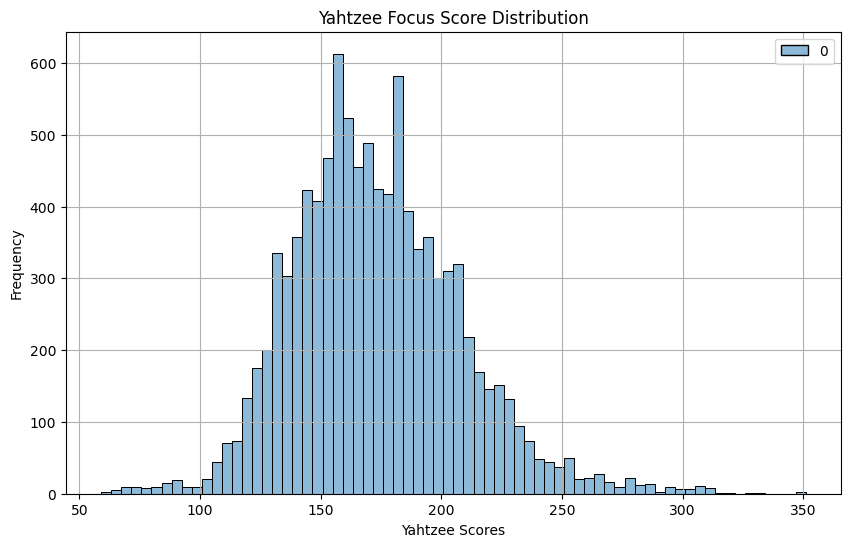

159.82


30.0

In [42]:
#Simulate 10000 times
#Careful running, it takes a bit.
yadata, yascores = Yahtz(10000)

#Create a histogram of the scoring distribution
df1 = pd.DataFrame(yadata)
plt.figure(figsize=(10, 6))
sns.histplot(data=df1)
plt.title('Yahtzee Focus Score Distribution')
plt.xlabel('Yahtzee Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

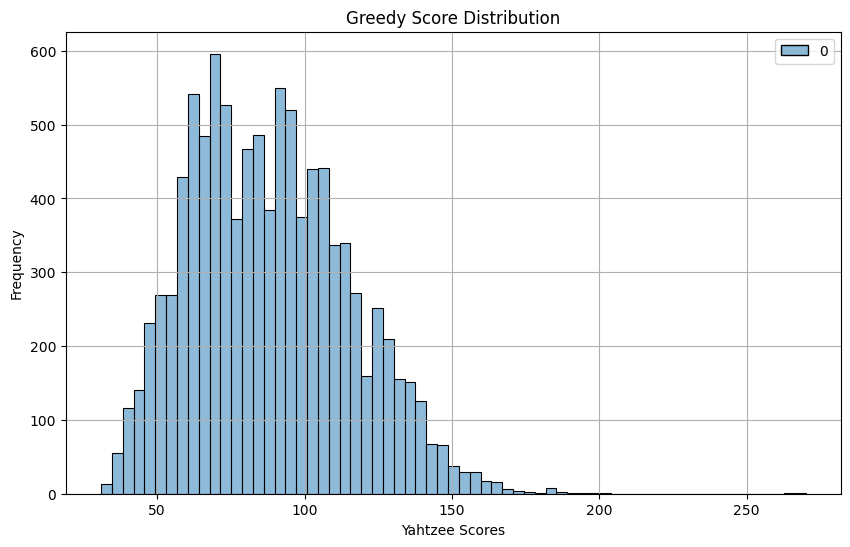

88.2936


43.385

In [52]:
#Simulate 10000 times
grdata, grscores = Greedy(10000)

#Generate Histogram for this distribution
grdf = pd.DataFrame(grdata)
plt.figure(figsize=(10, 6))
sns.histplot(data=grdf)
plt.title('Greedy Score Distribution')
plt.xlabel('Yahtzee Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

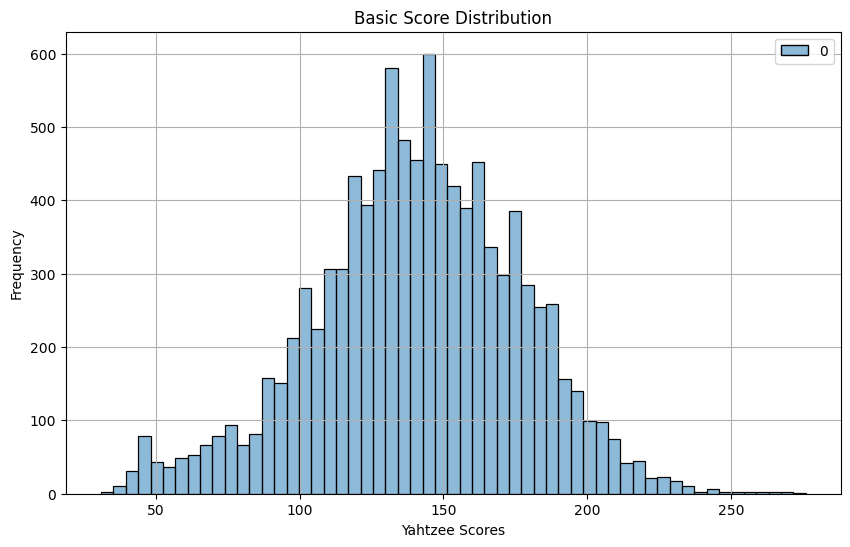

140.7498


43.43

In [83]:
#Simulate 10000 times
#Careful running, it takes a bit.
badata, bascores = Basic(10000)

#Generate Histogram
dfb = pd.DataFrame(badata)
plt.figure(figsize=(10, 6))
sns.histplot(data=dfb, color = 'green')
plt.title('Basic Score Distribution')
plt.xlabel('Yahtzee Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

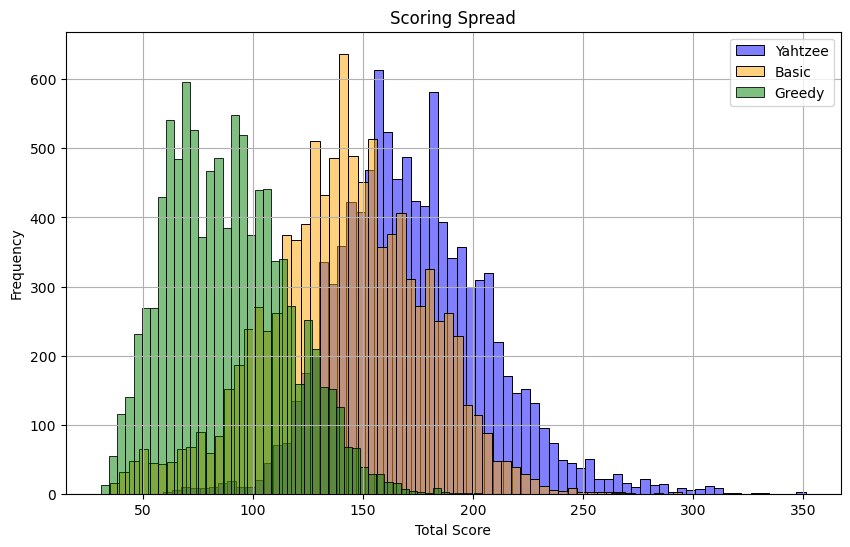

,Yahtzee Bot,Basic Bot,Greedy Bot
Statistic,,,
Mean,172.9839,141.2466,88.2936
Mean CI,"(172.3031180594615, 173.66468194053851)","(140.5386113406907, 141.9545886593093)","(87.7671920080985, 88.82000799190149)"
Variance,1206.479289,1304.837472,721.354534
Variance CI,"(1208.424035166275, 1208.5348999829232)","(1306.7822186346216, 1306.8930834512698)","(723.2992809408522, 723.4101457575007)"
Median,170.0,142.0,87.0
Median CI,"[114.0, 250.0]","[61.0, 207.0]","[44.0, 143.0]"


In [77]:
# Function to compute summary statistics
def compute_summary_stats(data):
    mean = np.mean(data)
    variance = np.var(data, ddof=1)  # Use ddof=1 for unbiased estimate
    median = np.median(data)
    confidence_interval_mean = stats.norm.interval(0.95, loc=mean, scale=stats.sem(data))
    confidence_interval_variance = stats.chi2.interval(0.95, df=len(data)-1, loc=variance, scale=2/len(data))
    confidence_interval_median = np.percentile(data, [2.5, 97.5])
    return mean, confidence_interval_mean, variance, confidence_interval_variance, median, confidence_interval_median

# Compute summary statistics for each dataset
yamean, yaconfmean, yavar, yaconfvar, yamed, yaconfmed = compute_summary_stats(yadata)
bamean, baconfmean, bavar, baconfvar, bamed, baconfmed = compute_summary_stats(badata)
grmean, grconfmean, grvar, grconfvar, grmed, grconfmed = compute_summary_stats(grdata)

# Create a table
summary_table = pd.DataFrame({
    'Statistic': ['Mean', 'Mean CI', 'Variance', 'Variance CI', 'Median', 'Median CI'],
    'Yahtzee Bot': [yamean, yaconfmean, yavar, yaconfvar, yamed, yaconfmed],
    'Basic Bot': [bamean, baconfmean, bavar, baconfvar, bamed, baconfmed],
    'Greedy Bot': [grmean, grconfmean, grvar, grconfvar, grmed, grconfmed]
})

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(yadata, color='blue', label='Yahtzee', alpha=0.5)
sns.histplot(badata, color='orange', label='Basic', alpha=0.5)
sns.histplot(grdata, color='green', label='Greedy', alpha=0.5)
plt.title('Scoring Spread')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

summary_table.set_index('Statistic')

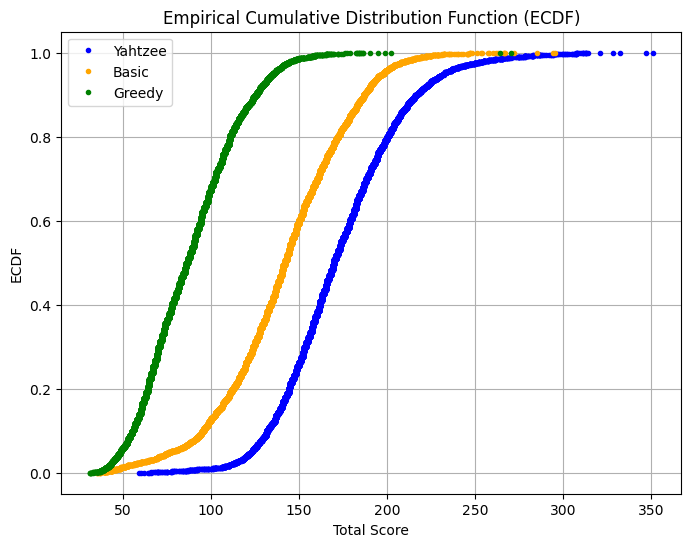

In [81]:
# Calculate ECDF for each dataset
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Calculate ECDFs
yax, yay = ecdf(yadata)
bax, bay = ecdf(badata)
grx, gry = ecdf(grdata)

# Plot ECDFs
plt.figure(figsize=(8, 6))
plt.plot(yax, yay, marker='.', linestyle='none', color='blue', label='Yahtzee')
plt.plot(bax, bay, marker='.', linestyle='none', color='orange', label='Basic')
plt.plot(grx, gry, marker='.', linestyle='none', color='green', label='Greedy')

plt.xlabel('Total Score')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
# Create a list of dataset names and corresponding datasets
dataset_names = ['yadata', 'badata', 'grdata']
datasets = [yadata, badata, grdata]

# Initialize lists to store results
t_statistics = []
p_values = []
hypothesis_results = []

# Perform two-sample t-test for each pair of datasets
for i in range(len(datasets)):
    for j in range(i+1, len(datasets)):
        t_statistic, p_value = stats.ttest_ind(datasets[i], datasets[j], equal_var=False)
        t_statistics.append(t_statistic)
        p_values.append(p_value)
        if p_value < alpha:
            hypothesis_results.append("Reject H0")
        else:
            hypothesis_results.append("Fail to reject H0")

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Dataset 1': [dataset_names[i] for i in range(len(dataset_names)) for _ in range(i+1, len(dataset_names))],
    'Dataset 2': [dataset_names[j] for i in range(len(dataset_names)) for j in range(i+1, len(dataset_names))],
    'T-Statistic': t_statistics,
    'P-Value': p_values,
    'Hypothesis Result': hypothesis_results
})

# Display the results table
results_df

,Dataset 1,Dataset 2,T-Statistic,P-Value,Hypothesis Result
0,yadata,badata,64.378853,0.0,Reject H0
1,yadata,grdata,192.885186,0.0,Reject H0
2,badata,grdata,116.660993,0.0,Reject H0


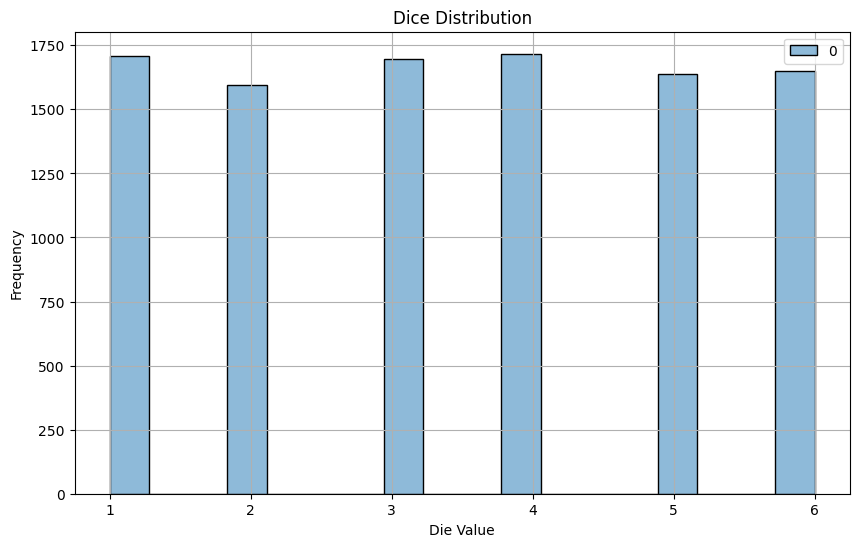

In [111]:
dice = [random.randrange(1, 7) for _ in range(10000)]
dicefb = pd.DataFrame(dice)
plt.figure(figsize=(10, 6))
sns.histplot(data=dicefb, color = 'green')
plt.title('Dice Distribution')
plt.xlabel('Die Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()